In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

In [4]:
## https://github.com/lukepolson/youtube_channel/blob/main/Python%20Metaphysics%20Series/vid14.ipynb

def energy(lattice):
    # applies the nearest neighbours summation
    kern = generate_binary_structure(2, 1) 
    kern[1][1] = False # dont include self in kernel 
    arr = -lattice * convolve(lattice, kern, mode='constant', cval=0)
    return arr.sum()

@numba.njit("Tuple((f8[:,:], f8[:], f8[:]))(f8[:,:], i8, f8, f8)", nopython=True, nogil=True)
def metropolis(spin_arr, times, BJ, energy):
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(times-1)
    net_energy = np.zeros(times-1)
    for t in range(0,times-1):
        # 2. pick random point on array and flip spin
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)
        spin_i = spin_arr[x,y] #initial spin
        spin_f = spin_i*-1 #proposed spin flip
        
        # compute change in energy
        E_i = 0
        E_f = 0
        
        # closed boundary conditions
        if x>0:
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        if x<N-1:
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        if y>0:
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        if y<N-1:
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]
        
        # # periodic boundary conditions
        # E_i += -spin_i*spin_arr[np.mod(x-1,N),y]
        # E_f += -spin_f*spin_arr[np.mod(x-1,N),y]
        # E_i += -spin_i*spin_arr[np.mod(x+1,N),y]
        # E_f += -spin_f*spin_arr[np.mod(x+1,N),y]
        # E_i += -spin_i*spin_arr[x,np.mod(y-1,N)]
        # E_f += -spin_f*spin_arr[x,np.mod(y-1,N)]
        # E_i += -spin_i*spin_arr[x,np.mod(y+1,N)]
        # E_f += -spin_f*spin_arr[x,np.mod(y+1,N)]
        
        # 3 / 4. change state with designated probabilities
        dE = E_f-E_i
        if (dE>0)*(np.random.random() < np.exp(-BJ*dE)):
            spin_arr[x,y]=spin_f
            energy += dE
        elif dE<=0:
            spin_arr[x,y]=spin_f
            energy += dE
            
        net_spins[t] = spin_arr.sum()
        net_energy[t] = energy
            
    return spin_arr, net_spins, net_energy

In [3]:
# 50 by 50 grid
N = 100

r = np.random.random((N,N))
lattice = np.ones((N, N))
lattice[np.random.random((N,N))<0.75] = -1

/var/folders/jc/sl3t18_x1vl1_n5kdkxdyn480000gn/T/ipykernel_1723/892307527.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


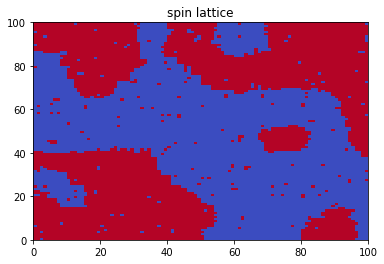

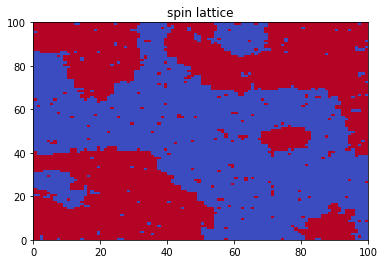

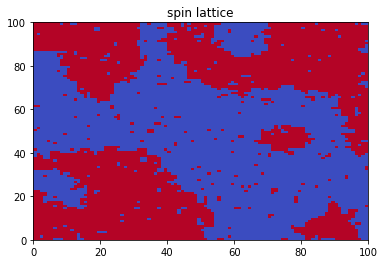

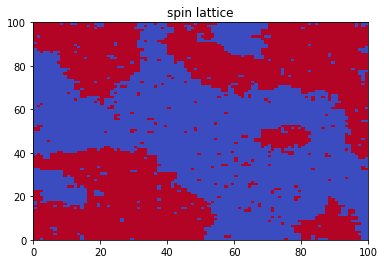

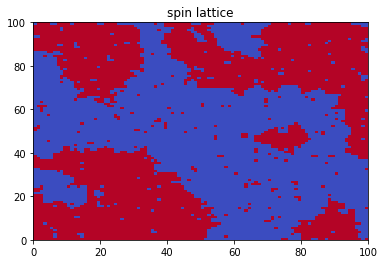

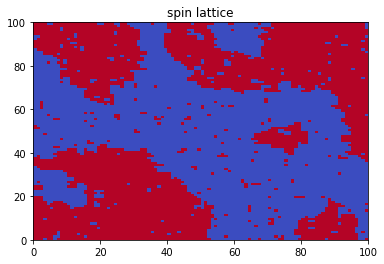

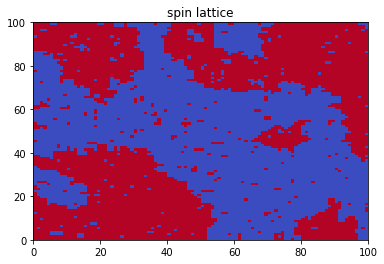

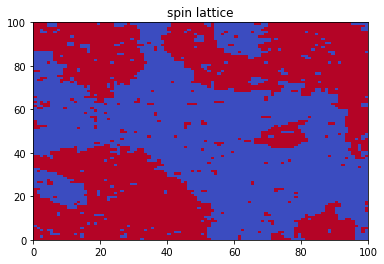

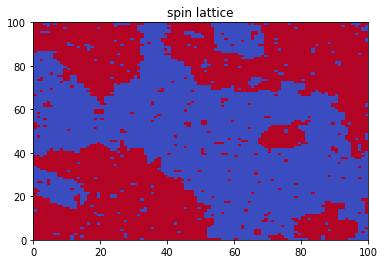

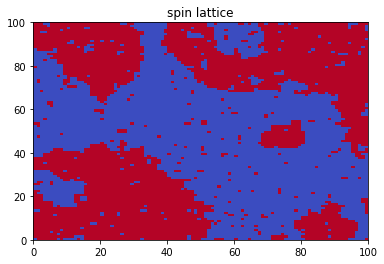

In [10]:
# lattice,spins, energies = metropolis(lattice, 10, 0.2, energy(lattice))
for i in range(10):
    
    lattice,spins, energies = metropolis(lattice, 10000, 0.5, energy(lattice))
    
    fig, ax = plt.subplots()
    
    pc = ax.pcolormesh(lattice, cmap=cm.coolwarm, vmin = -1, vmax = 1)
    ax.set_title('spin lattice')
    
    fig.show()
#     im.set_data(state)
#     
#     plt.pause(1)  # In interactive mode, need a small delay to get the plot to appear
#     fig.show()